In [236]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [237]:
def CalculateCo_occurrence(image):
    image = np.array(image)
    unique_values = np.unique(image)
    Shape = len(unique_values)
    co_occurrence_matrix = np.zeros((Shape, Shape), dtype=int)
    rows, cols = image.shape
    for i in range(rows - 1):
        for j in range(cols):
            pixel_value = image[i, j]
            neighbor_value = image[i + 1, j]
            co_occurrence_matrix[np.where(unique_values == pixel_value)[0][0], np.where(unique_values == neighbor_value)[0][0]] += 1
    return co_occurrence_matrix

In [238]:
# Example usage:
image = np.array([[4, 5, 6, 7, 8],
                  [4, 5, 6, 7, 8],
                  [4, 5, 6, 7, 8],
                  [4, 5, 6, 7, 8]])

co_matrix = CalculateCo_occurrence(image)
print("Co-occurrence matrix for image:")
print(co_matrix)

image2 = np.array([[1, 2, 3, 4],
                   [2, 3, 4, 5],
                   [3, 4, 5, 6],
                   [4, 5, 6, 7]])

co_matrix2 = CalculateCo_occurrence(image2)
print("\nCo-occurrence matrix for image2:")
print(co_matrix2)

image3 = np.array([[6, 5, 6, 7, 8],
                   [6, 5, 6, 7, 8],
                   [4, 5, 6, 7, 6],
                   [4, 5, 6, 7, 6]])

co_matrix3 = CalculateCo_occurrence(image3)
print("\nCo-occurrence matrix for image3:")
print(co_matrix3)

image4 = np.array([[10, 20, 30, 40],
                   [20, 30, 40, 50],
                   [30, 40, 50, 60],
                   [40, 50, 60, 70]])

co_matrix4 = CalculateCo_occurrence(image4)
print("\nCo-occurrence matrix for image4:")
print(co_matrix4)


Co-occurrence matrix for image:
[[3 0 0 0 0]
 [0 3 0 0 0]
 [0 0 3 0 0]
 [0 0 0 3 0]
 [0 0 0 0 3]]

Co-occurrence matrix for image2:
[[0 1 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]]

Co-occurrence matrix for image3:
[[1 0 0 0 0]
 [0 3 0 0 0]
 [1 0 5 0 0]
 [0 0 0 3 0]
 [0 0 1 0 1]]

Co-occurrence matrix for image4:
[[0 1 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0]]


In [239]:
!wget -O image2.png "https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png"
im2 = Image.open("image2.png").convert('L') #to open the uploaded image and use it
print(im2)

--2023-10-20 00:24:46--  https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png
Resolving networkcameratech.com (networkcameratech.com)... 54.157.250.197
Connecting to networkcameratech.com (networkcameratech.com)|54.157.250.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1561813 (1.5M) [image/png]
Saving to: ‘image2.png’

image2.png          100%[===================>]   1.49M  --.-KB/s    in 0.1s    

2023-10-20 00:24:46 (10.5 MB/s) - ‘image2.png’ saved [1561813/1561813]

<PIL.Image.Image image mode=L size=2688x1520 at 0x7A762261A7D0>


In [240]:
co_matrixNew = CalculateCo_occurrence(im2)
print("\nCo-occurrence matrix for an online image:")
print(co_matrixNew)


Co-occurrence matrix for an online image:
[[   2    1    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...  129   39   56]
 [   0    0    0 ...   46  149  102]
 [   0    0    0 ...   37  106 2179]]


In [241]:
def CalculateHistogram(image):
    image = np.array(image)
    histogram = np.zeros(256, dtype=int)
    for row in image:
        for pixel_value in row:
            histogram[pixel_value] += 1
    return histogram

[   19    13    11    28    44    79   171     0   253   440   675  1151
  1927  3093     0  4572  6816  9362 12368 16437 20524     0 25046 29286
 33403 37391 40691 43937     0 46650 48795 50205 51078 52184 51500     0
 52307 51768 51731 51215 51748 51797     0 50913 50056 49196 47980 47666
 46680     0 45771 45749 45061 44121 43454 42043     0 40884 38631 37224
 35623 34348 33607     0 32718 32108 31035 31030 30380 30016     0 29920
 29781 29135 28804 28633 28954     0 29193 28984 29550 30498 31058 31348
     0 31010 31330 31403 31348 30499 30445 30171     0 29558 29467 29245
 29123 29124 29120     0 29578 28684 28907 29374 28992 29180     0 30004
 29990 30079 30335 30587 30182     0 30429 29909 29152 28415 27980 26782
     0 25332 23709 22563 21019 19909 18307     0 16935 15881 14334 13746
 13041 12296     0 11939 11256 11112 10897 10855 10458     0 10305  9791
  9853  9530  9397  9060     0  8794  8611  8657  8738  8553  8372     0
  8427  8247  8254  8550  8337  8237     0  7979  7

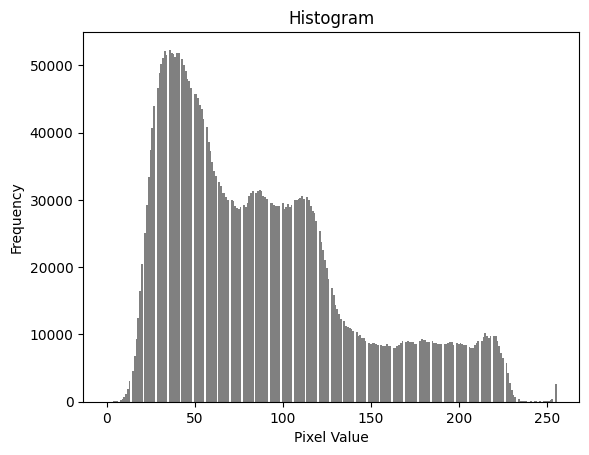

In [242]:
histogram = CalculateHistogram(im2)
print(histogram)

# Plot the histogram
plt.figure()
plt.bar(range(256), histogram, width=1.0, color='gray')
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

In [243]:
def CalculateCumulativeHistogram(histogram):
    histogramN = np.array(histogram)
    if len(histogramN) != 256:
        raise ValueError("Histogram should have 256 bins for grayscale images.")
    cumulative_histogramN = np.zeros(256, dtype=int)
    cumulative_count = 0
    for i in range(256):
        cumulative_count += histogramN[i]
        cumulative_histogramN[i] = cumulative_count

    return cumulative_histogramN

[     19      32      43      71     115     194     365     365     618
    1058    1733    2884    4811    7904    7904   12476   19292   28654
   41022   57459   77983   77983  103029  132315  165718  203109  243800
  287737  287737  334387  383182  433387  484465  536649  588149  588149
  640456  692224  743955  795170  846918  898715  898715  949628  999684
 1048880 1096860 1144526 1191206 1191206 1236977 1282726 1327787 1371908
 1415362 1457405 1457405 1498289 1536920 1574144 1609767 1644115 1677722
 1677722 1710440 1742548 1773583 1804613 1834993 1865009 1865009 1894929
 1924710 1953845 1982649 2011282 2040236 2040236 2069429 2098413 2127963
 2158461 2189519 2220867 2220867 2251877 2283207 2314610 2345958 2376457
 2406902 2437073 2437073 2466631 2496098 2525343 2554466 2583590 2612710
 2612710 2642288 2670972 2699879 2729253 2758245 2787425 2787425 2817429
 2847419 2877498 2907833 2938420 2968602 2968602 2999031 3028940 3058092
 3086507 3114487 3141269 3141269 3166601 3190310 32

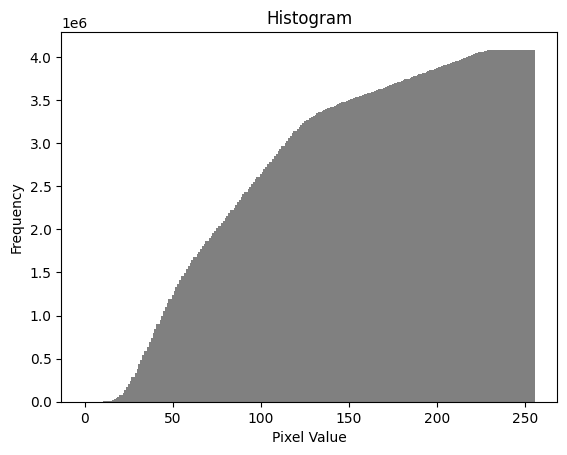

In [244]:
cumulative_histogram = CalculateCumulativeHistogram(histogram)

print(cumulative_histogram)


plt.figure()
plt.bar(range(256), cumulative_histogram, width=1.0, color='gray')
plt.title("Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

In [245]:
def CalculateContrast(co_occurrence_matrix):
    co_occurrence_matrix = np.array(co_occurrence_matrix)
    num_rows, num_cols = co_occurrence_matrix.shape
    numerator = 0
    denominator = 0
    for i in range(num_rows):
        for j in range(num_cols):
            numerator += co_occurrence_matrix[i, j] * abs(i - j)
            denominator += abs(i - j)
    if denominator != 0:
        contrast = numerator / denominator
    else:
        contrast = 0
    return contrast

In [246]:
print(f"Contrast of the first matrix:\n{CalculateContrast(co_matrix)}.")
print(f"Contrast of the second matrix:\n{CalculateContrast(co_matrix2)}.")
print(f"Contrast of the third matrix:\n{CalculateContrast(co_matrix3)}.")
print(f"Contrast of the fourth matrix:\n{CalculateContrast(co_matrix4)}.")
print(f"Contrast of the fifth matrix:\n{CalculateContrast(co_matrixNew)}.")

Contrast of the first matrix:
0.0.
Contrast of the second matrix:
0.10714285714285714.
Contrast of the third matrix:
0.1.
Contrast of the fourth matrix:
0.10714285714285714.
Contrast of the fifth matrix:
1.9796467432647933.


In [247]:
!wget -O image.png "https://images.squarespace-cdn.com/content/v1/5eb9df33b77a9729b4d3b5f9/2f4bbcfd-87c2-4253-a62e-971770630976/ghost+1.png"
im = Image.open("image.png").convert('L') #to open the uploaded image and use it
print(im)

--2023-10-20 00:25:16--  https://images.squarespace-cdn.com/content/v1/5eb9df33b77a9729b4d3b5f9/2f4bbcfd-87c2-4253-a62e-971770630976/ghost+1.png
Resolving images.squarespace-cdn.com (images.squarespace-cdn.com)... 151.101.0.238, 151.101.64.238, 151.101.128.238, ...
Connecting to images.squarespace-cdn.com (images.squarespace-cdn.com)|151.101.0.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61598 (60K) [image/jpeg]
Saving to: ‘image.png’

image.png           100%[===================>]  60.15K  --.-KB/s    in 0.01s   

2023-10-20 00:25:16 (3.94 MB/s) - ‘image.png’ saved [61598/61598]

<PIL.Image.Image image mode=L size=1920x1080 at 0x7A7623CED7B0>


In [248]:
co_matrixNew2 = CalculateCo_occurrence(im)
print("\nCo-occurrence matrix for lecture image:")
print(co_matrixNew2)


Co-occurrence matrix for lecture image:
[[  449    17    12 ...    12     1    37]
 [   13    96     5 ...     2     1     3]
 [   15     2   100 ...    17     1     7]
 ...
 [    5     3     1 ...   257    49   164]
 [   10     0     6 ...    58   280   209]
 [   42     5    17 ...   207   245 18137]]


In [249]:
print(f"Contrast of the lecture matrix:\n{CalculateContrast(co_matrixNew2)}.")

Contrast of the lecture matrix:
0.35504352397573813.


In [250]:
def GetColorAtPercentage(cumulative_histogram, percentage):
    intensity1 = 0
    intensity2 = 0
    for i in range(len(cumulative_histogram)):
        intensity_per = cumulative_histogram[i]/cumulative_histogram[-1]
        if (intensity_per>=percentage):
            intensity1 = i
            break
    for i in range(len(cumulative_histogram)):
        intensity_per = cumulative_histogram[i]/cumulative_histogram[-1]
        if (intensity_per>=1-percentage):
            intensity2 = i
            break
    return intensity1, intensity2

In [251]:
percentage1 = 0.05
left_intensity1, right_intensity1 = GetColorAtPercentage(CalculateCumulativeHistogram(CalculateHistogram(im)), percentage1)
print(f"Color intensity at {percentage1}% from the left: {left_intensity1}")
print(f"Color intensity at {100 - percentage1}% from the right: {right_intensity1}")

percentage2 = 0.1
left_intensity2, right_intensity2 = GetColorAtPercentage(CalculateCumulativeHistogram(CalculateHistogram(im)), percentage2)
print(f"Color intensity at {percentage2}% from the left: {left_intensity2}")
print(f"Color intensity at {100 - percentage2}% from the right: {right_intensity2}")

percentage3 = 0.15
left_intensity3, right_intensity3 = GetColorAtPercentage(CalculateCumulativeHistogram(CalculateHistogram(im)), percentage3)
print(f"Color intensity at {percentage3}% from the left: {left_intensity3}")
print(f"Color intensity at {100 - percentage3}% from the right: {right_intensity3}")

Color intensity at 0.05% from the left: 88
Color intensity at 99.95% from the right: 152
Color intensity at 0.1% from the left: 92
Color intensity at 99.9% from the right: 147
Color intensity at 0.15% from the left: 96
Color intensity at 99.85% from the right: 143


In [252]:
def StretchContrast(image, a, b, c, d):
    inputIntensities = [a,b,c,d]
    if any(inputVal < 0 or inputVal > 255 for inputVal in inputIntensities):
      print("One or more of the input intensities is outside the range [0,255], Returning Original Image.")
      return image
    image = np.array(image, dtype=np.float64)
    image = np.clip(image, a, b)
    stretched_image = ((image - c) * (b - a) / (d - c)) + a
    stretched_image = np.clip(stretched_image, a, b)
    stretched_image = np.uint8(stretched_image)
    return stretched_image

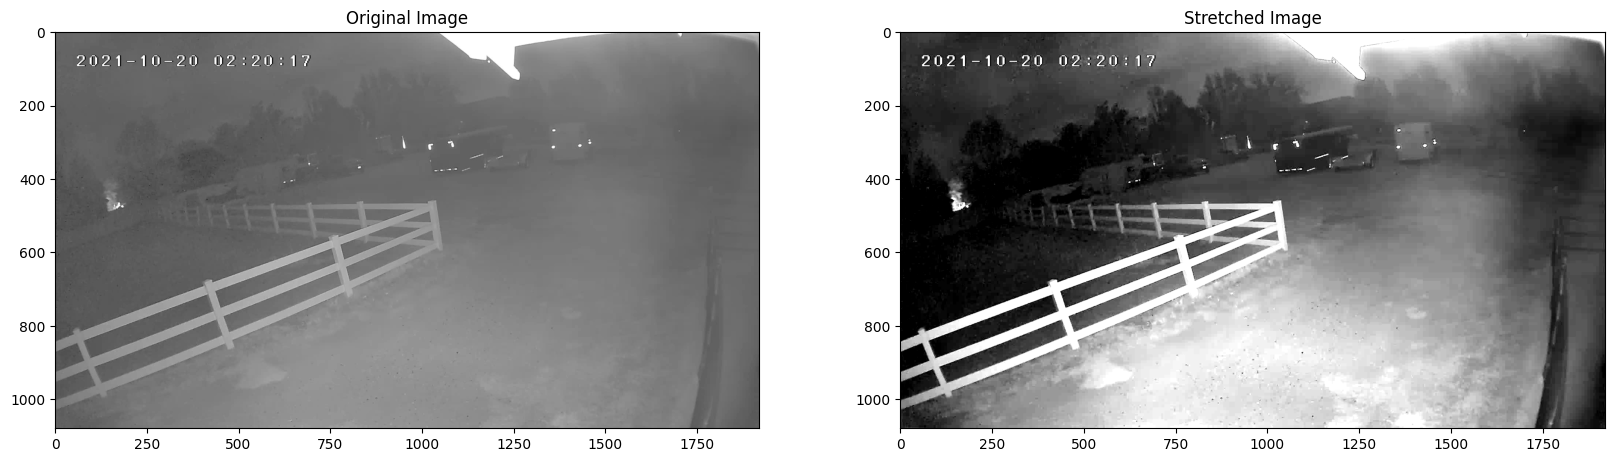

In [253]:
a = 0
b = 255
c = 88
d = 151
stretched_image = StretchContrast(im, a, b, c, d)

histo_original = CalculateHistogram(im)
cum_original = CalculateCumulativeHistogram(histo_original)

histo_stretched = CalculateHistogram(stretched_image)
cum_stretched = CalculateCumulativeHistogram(histo_stretched)

fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray', vmin=0, vmax=255)
plt.title("Stretched Image")


fig.set_size_inches(20, 14)
fig.set_dpi(100)

plt.show()

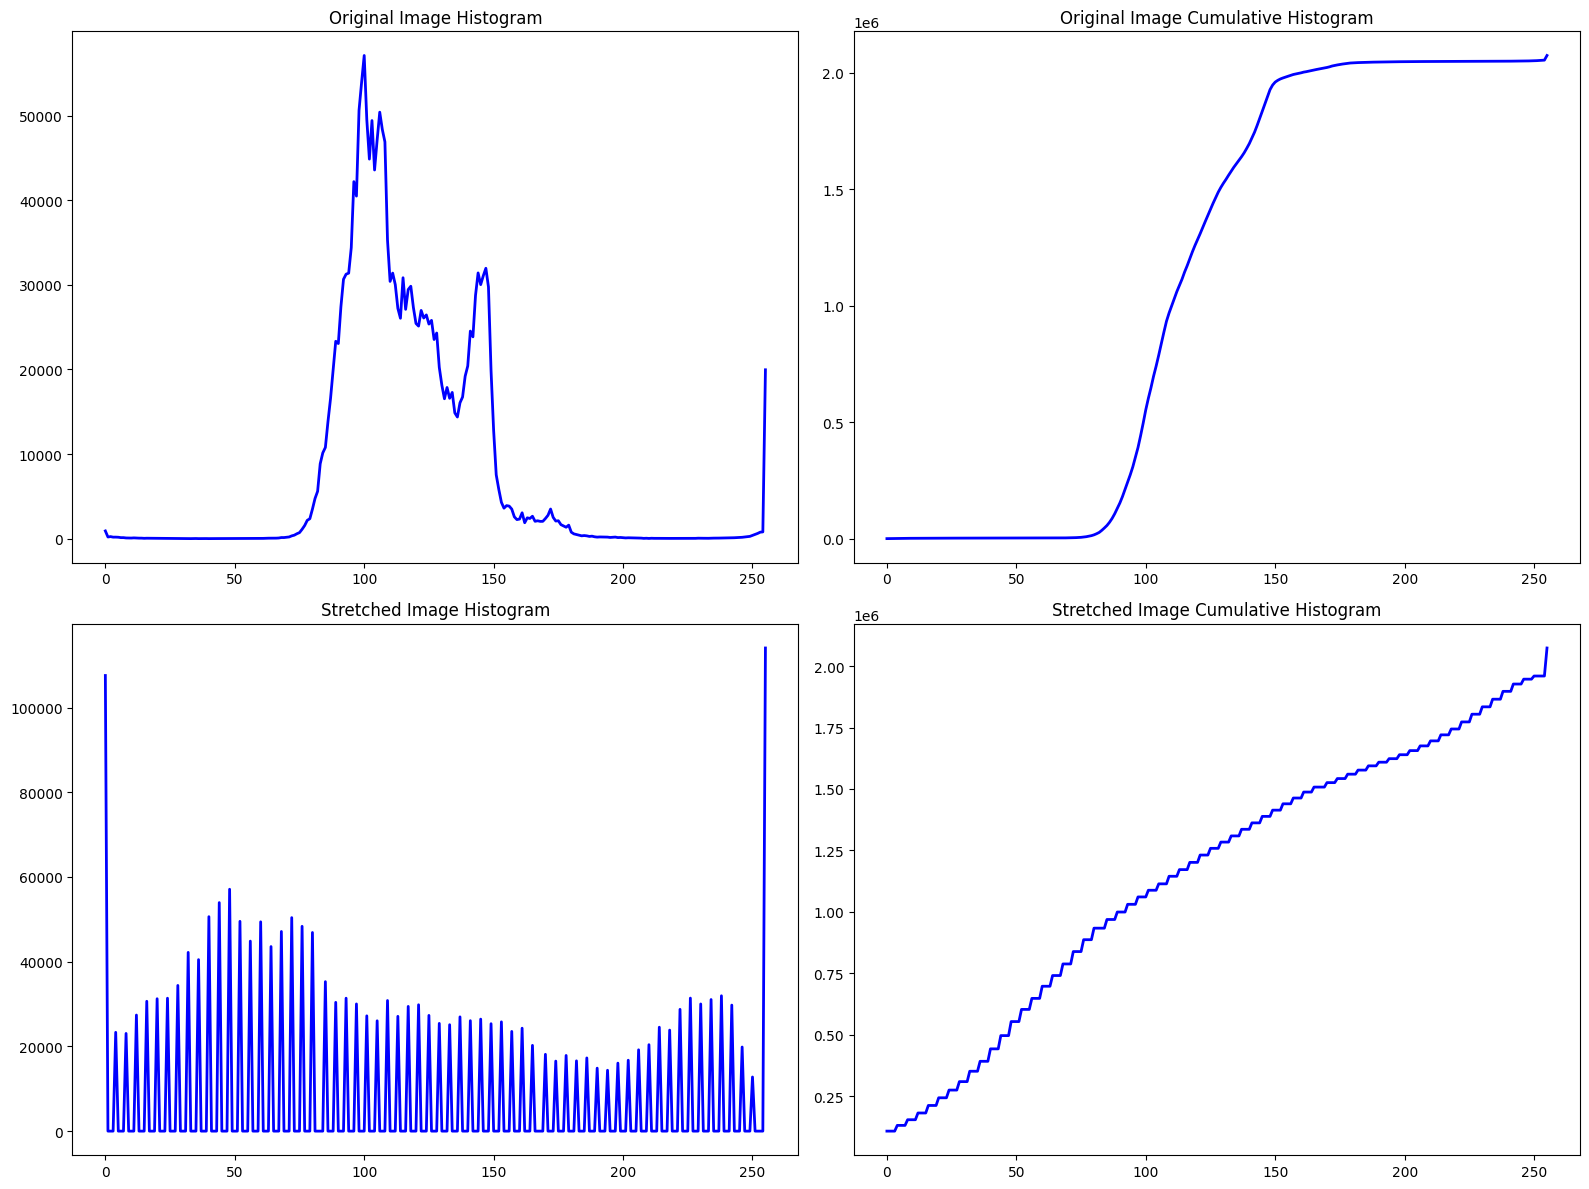

In [254]:
# Plot the histograms and cumulative histograms
plt.figure(figsize=(16, 12))

# Original Image Histogram
plt.subplot(2, 2, 1)
plt.title("Original Image Histogram")
plt.plot(histo_original, color='blue', linewidth=2)

# Original Image Cumulative Histogram
plt.subplot(2, 2, 2)
plt.title("Original Image Cumulative Histogram")
plt.plot(cum_original, color='blue', linewidth=2)

# Stretched Image Histogram
plt.subplot(2, 2, 3)
plt.title("Stretched Image Histogram")
plt.plot(histo_stretched, color='blue', linewidth=2)

# Stretched Image Cumulative Histogram
plt.subplot(2, 2, 4)
plt.title("Stretched Image Cumulative Histogram")
plt.plot(cum_stretched, color='blue', linewidth=2)


plt.tight_layout()
plt.show()

In [255]:
def EqualizeHistogram(image, intensity1, intensity2):
    image = np.array(image)
    maxColorInImage = np.max(image)
    intensity_max = max(intensity1, intensity2)
    intensity_min = min(intensity1, intensity2)
    if intensity_max > 255 or intensity_min < 0:
      print("One of the intensities is out of the range [0,255], Returning Original Image.")
      return image
    hist = np.zeros(256)
    for pixel in image.flatten():
        hist[pixel] += 1
    cdf = np.zeros_like(hist)
    cdf[0] = hist[0]
    for i in range(256):
        cdf[i] = cdf[i - 1] + hist[i]
    cdf_min = cdf[intensity_min]
    cdf_max = cdf[intensity_max]
    cdf_norm = np.round(((cdf - cdf_min) * maxColorInImage) / (cdf_max - cdf_min))
    cdf_norm = np.clip(cdf_norm, 0, 255)
    image_equalized = cdf_norm[image]
    image_equalized = image_equalized.astype(np.uint8)
    return image_equalized

Intensity values are the following: [Min:92, Max:147]


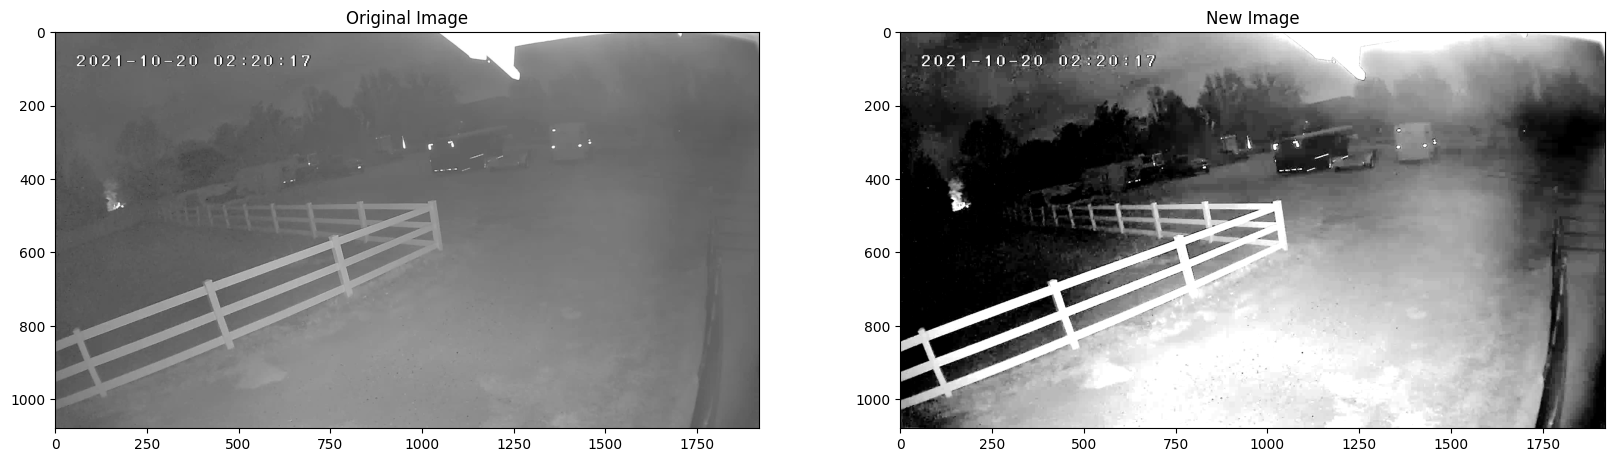

In [256]:
# # Testing on the whole range:
# min_intensity = 0 # Minimum color intensity
# max_intensity = 255  # Maximum color intensity

# Testing with the GetColorAtPercentage Function:
min_intensity, max_intensity = GetColorAtPercentage(CalculateCumulativeHistogram(CalculateHistogram(im)), 0.1) # Minimum color intensity

print(f"Intensity values are the following: [Min:{min_intensity}, Max:{max_intensity}]")
im = np.array(im)
equalized_image = EqualizeHistogram(im, min_intensity, max_intensity)


histo_original = CalculateHistogram(im)
cum_original = CalculateCumulativeHistogram(histo_original)

histo_equalized = CalculateHistogram(equalized_image)
cum_equalized = CalculateCumulativeHistogram(histo_equalized)

fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
plt.title("New Image")


fig.set_size_inches(20, 14)
fig.set_dpi(100)

plt.show()

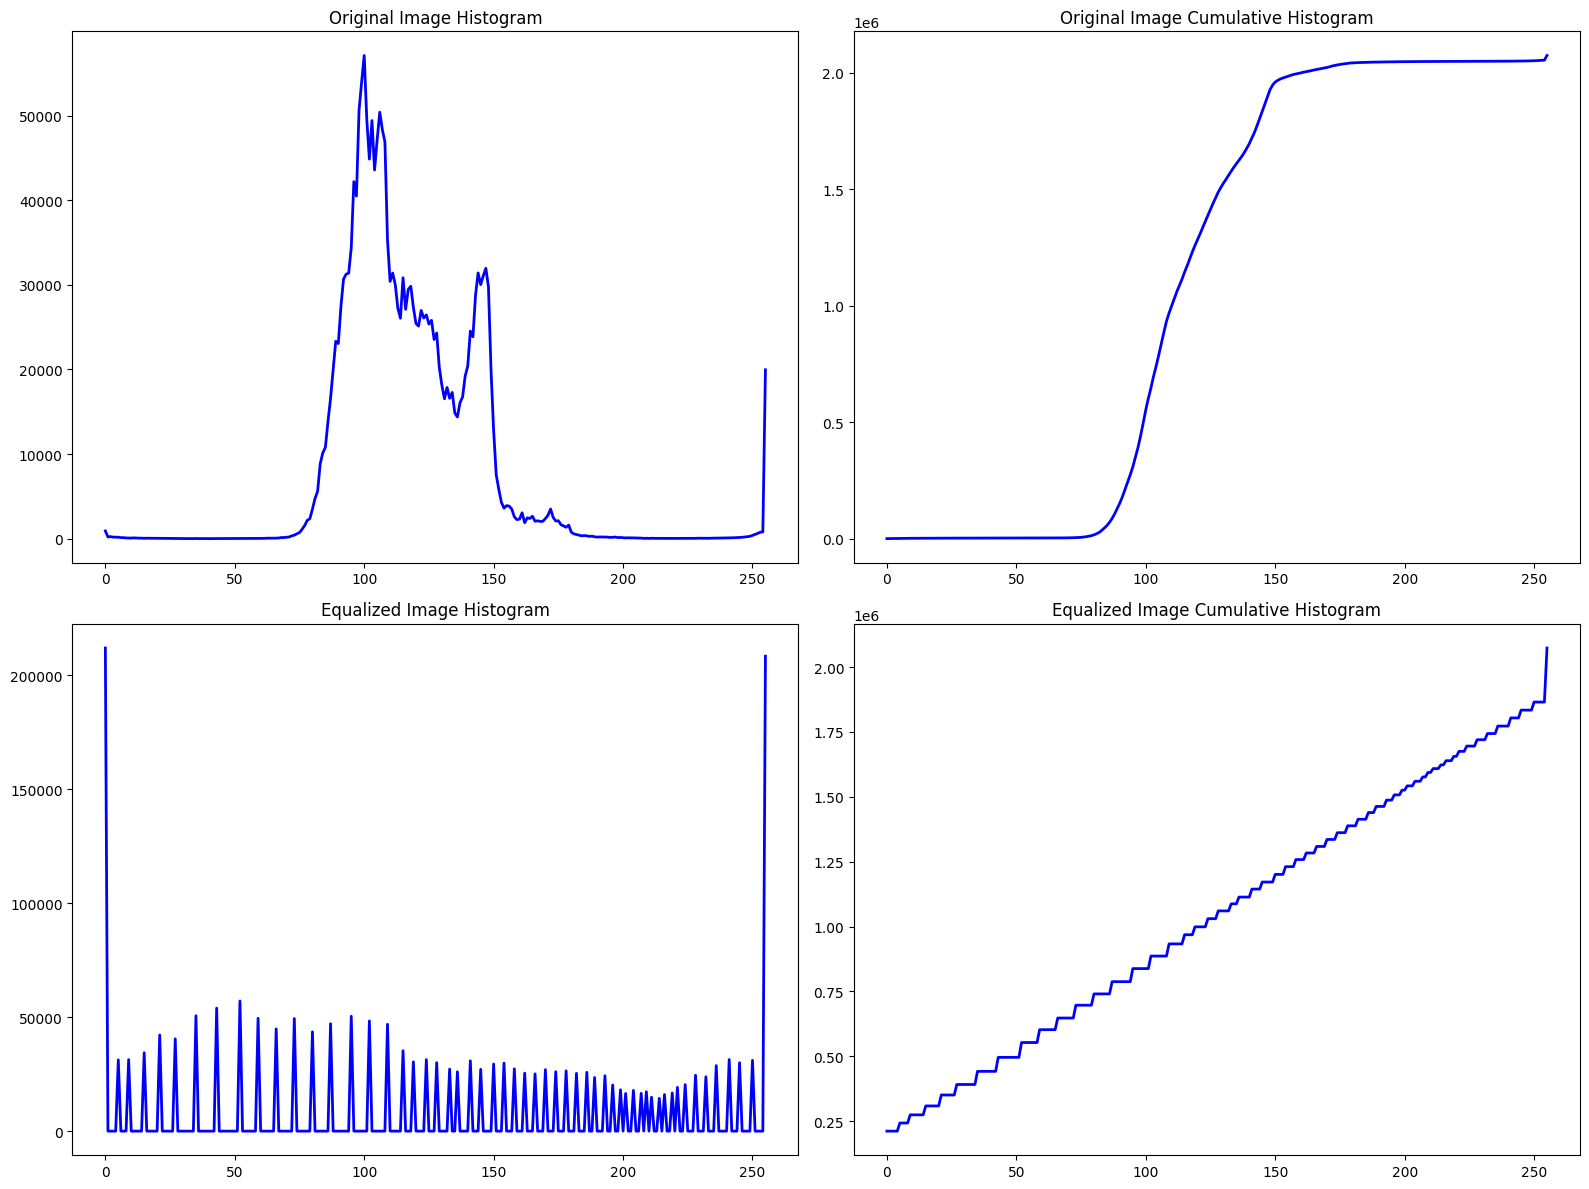

In [257]:
# Plot the histograms and cumulative histograms
plt.figure(figsize=(16, 12))

# Original Image Histogram
plt.subplot(2, 2, 1)
plt.title("Original Image Histogram")
plt.plot(histo_original, color='blue', linewidth=2)

# Original Image Cumulative Histogram
plt.subplot(2, 2, 2)
plt.title("Original Image Cumulative Histogram")
plt.plot(cum_original, color='blue', linewidth=2)

# Equalized Image Histogram
plt.subplot(2, 2, 3)
plt.title("Equalized Image Histogram")
plt.plot(histo_equalized, color='blue', linewidth=2)

# Equalized Image Cumulative Histogram
plt.subplot(2, 2, 4)
plt.title("Equalized Image Cumulative Histogram")
plt.plot(cum_equalized, color='blue', linewidth=2)


plt.tight_layout()
plt.show()

In [258]:
def GrayScaleTransformation(image, x1, x2, y1, y2):
    inputIntensities = [x1,x2,y1,y2]
    if any(inputVal < 0 or inputVal > 255 for inputVal in inputIntensities):
      print("One or more of the input intensities is outside the range [0,255], Returning Original Image.")
      return image
    image = np.array(image, dtype=np.float64)
    transformed_image = np.piecewise(image, [image < x1, (x1 <= image) & (image < x2), image >= x2],
                                      [lambda p: p * (y1 / x1),
                                       lambda p: ((p - x1) * ((y2 - y1) / (x2 - x1))) + y1,
                                       lambda p: ((p - x2) * ((255 - y2) / (255 - x2))) + y2])

    transformed_image = np.clip(transformed_image, 0, 255)
    transformed_image = np.uint8(transformed_image)
    return transformed_image

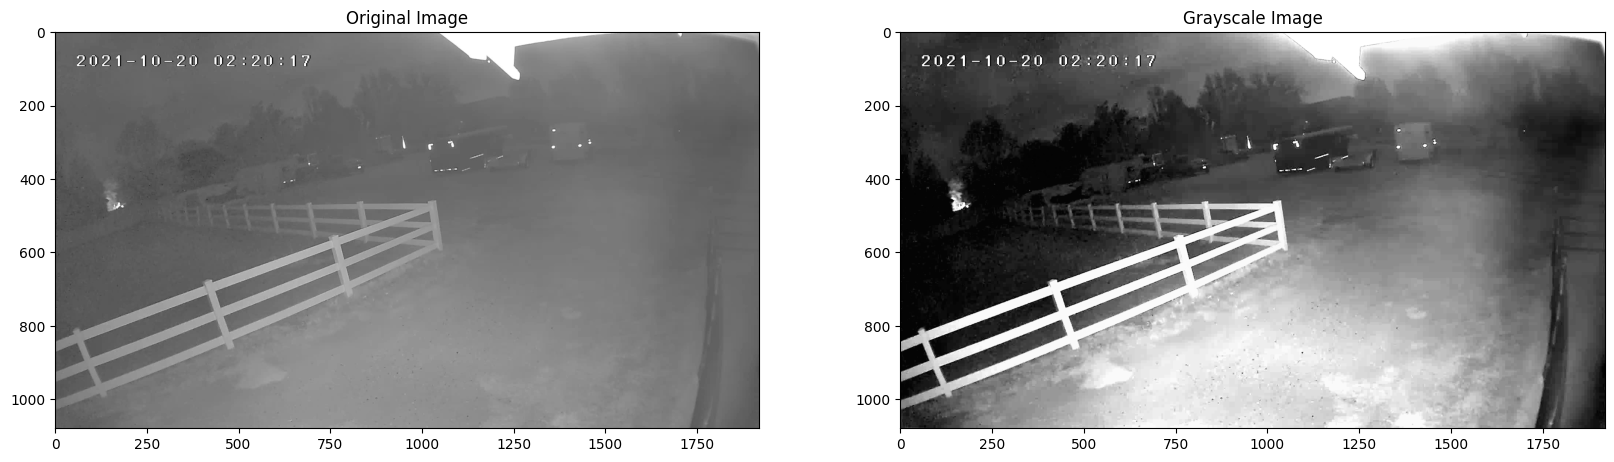

In [259]:
x1 = 88
x2 = 151
y1 = 5
y2 = 250
im = np.array(im)
grayscaleimage = GrayScaleTransformation(im, x1, x2,y1,y2)

histo_original = CalculateHistogram(im)
cum_original = CalculateCumulativeHistogram(histo_original)

histo_grayscaleimage = CalculateHistogram(grayscaleimage)
cum_grayscaleimage = CalculateCumulativeHistogram(histo_grayscaleimage)

fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(im, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(grayscaleimage, cmap='gray', vmin=0, vmax=255)
plt.title("Grayscale Image")

fig.set_size_inches(20, 14)
fig.set_dpi(100)

plt.show()

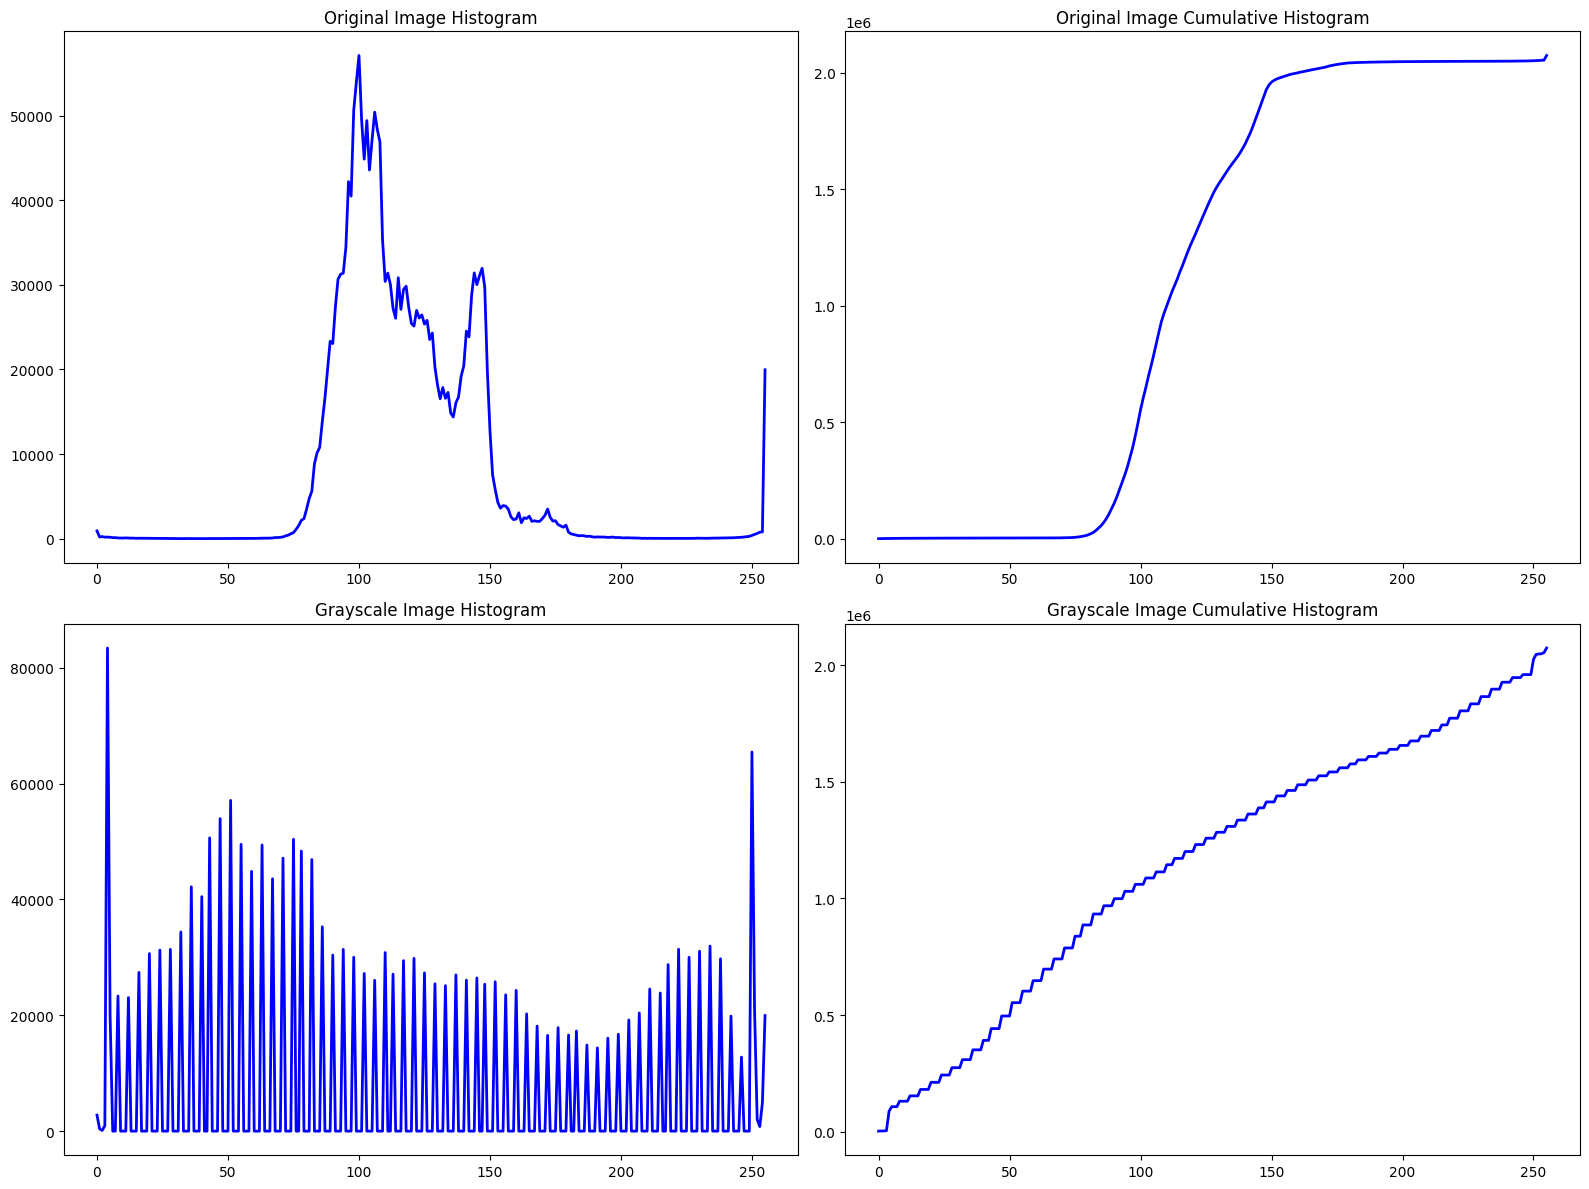

In [260]:
# Plot the histograms and cumulative histograms
plt.figure(figsize=(16, 12))

# Original Image Histogram
plt.subplot(2, 2, 1)
plt.title("Original Image Histogram")
plt.plot(histo_original, color='blue', linewidth=2)

# Original Image Cumulative Histogram
plt.subplot(2, 2, 2)
plt.title("Original Image Cumulative Histogram")
plt.plot(cum_original, color='blue', linewidth=2)

# Grayscale Image Histogram
plt.subplot(2, 2, 3)
plt.title("Grayscale Image Histogram")
plt.plot(histo_grayscaleimage, color='blue', linewidth=2)

# Grayscale Image Cumulative Histogram
plt.subplot(2, 2, 4)
plt.title("Grayscale Image Cumulative Histogram")
plt.plot(cum_grayscaleimage, color='blue', linewidth=2)


plt.tight_layout()
plt.show()